# Using K-Means Clustering for market data segmentation for better product marketting
Dataset credits- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv('Mall_Customers.csv')

In [37]:
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.shape

(200, 5)

In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
df.drop(["CustomerID"],axis=1, inplace=True)

In [27]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


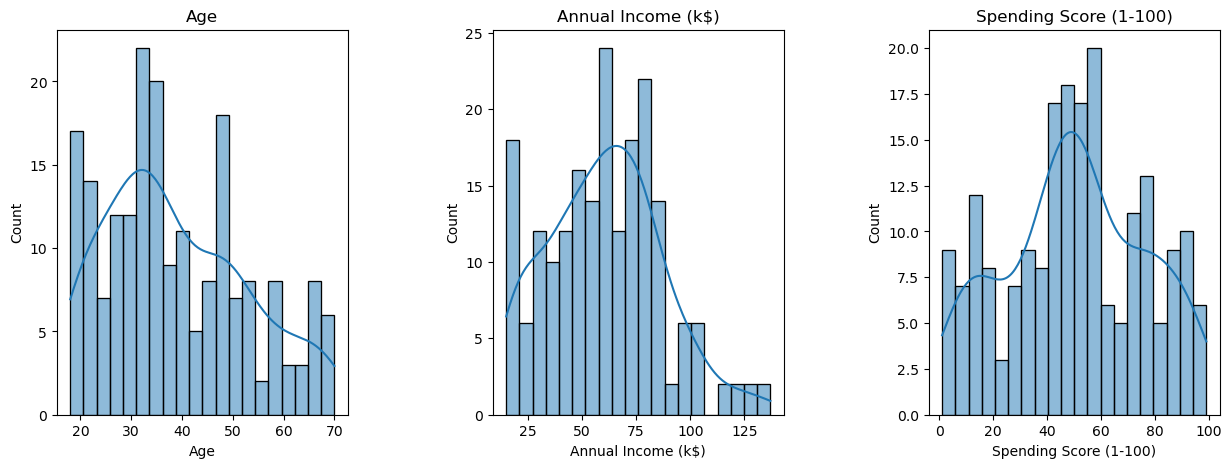

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

n = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.histplot(df[x], bins=20, kde=True, ax=axes[n])  
    axes[n].set_title(x)  
    n += 1

plt.show()


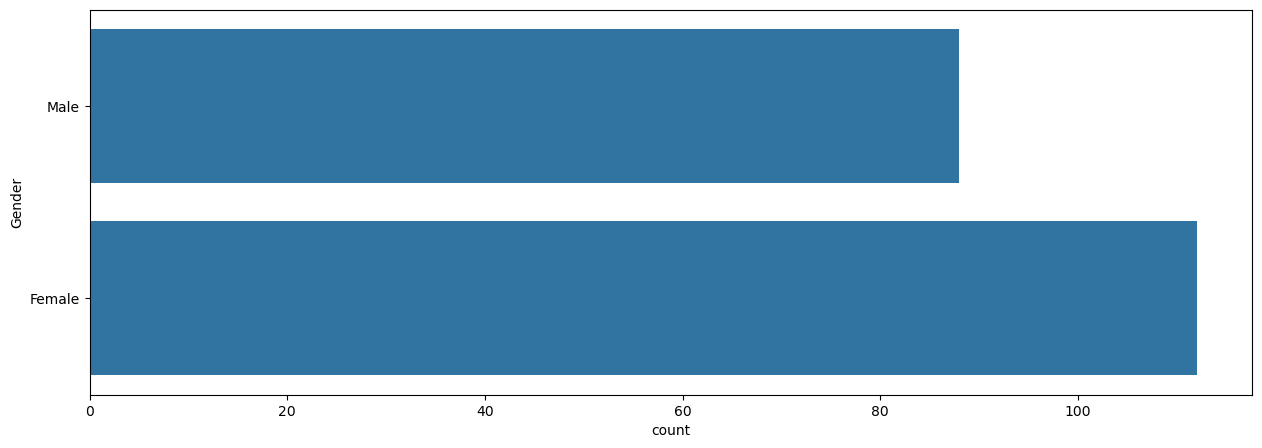

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()

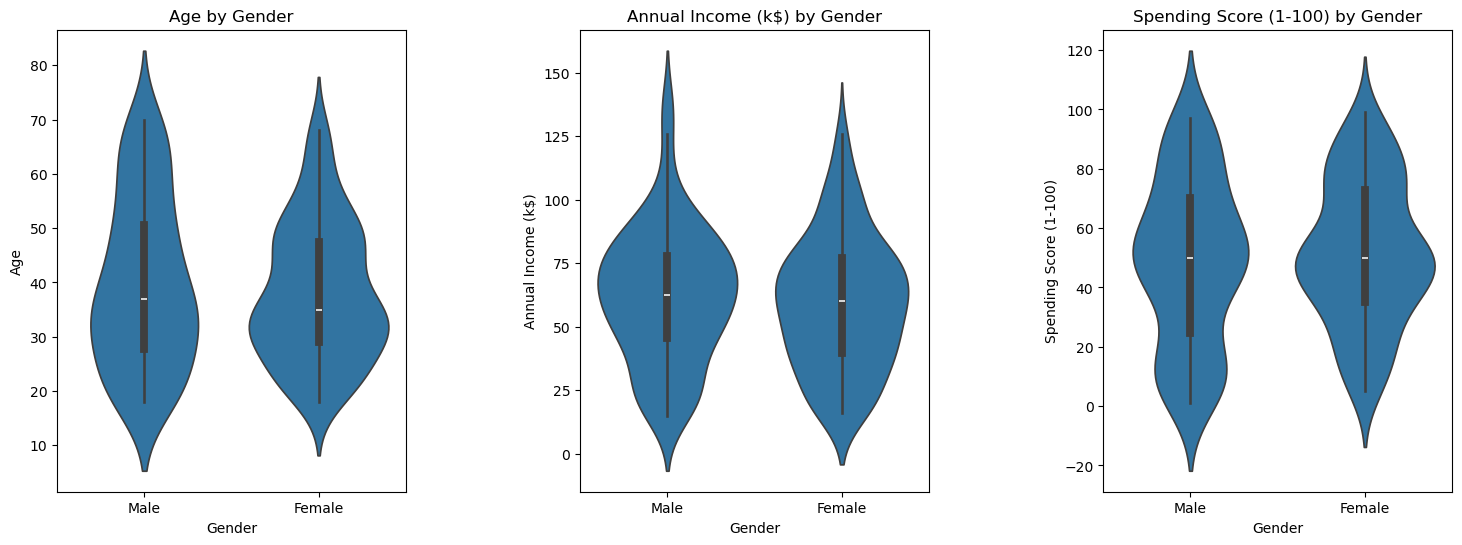

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.5)

sns.violinplot(x='Gender', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age by Gender')

sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, ax=axes[1])
axes[1].set_title('Annual Income (k$) by Gender')

sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[2])
axes[2].set_title('Spending Score (1-100) by Gender')

plt.show()

/scratch/local/41962174/ipykernel_1111420/374543972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df, split=True, ax=axes[0], palette={"Male": "skyblue", "Female": "lightpink"})
/scratch/local/41962174/ipykernel_1111420/374543972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, split=True, ax=axes[1], palette={"Male": "skyblue", "Female": "lightpink"})
/scratch/local/41962174/ipykernel_1111420/374543972.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplo

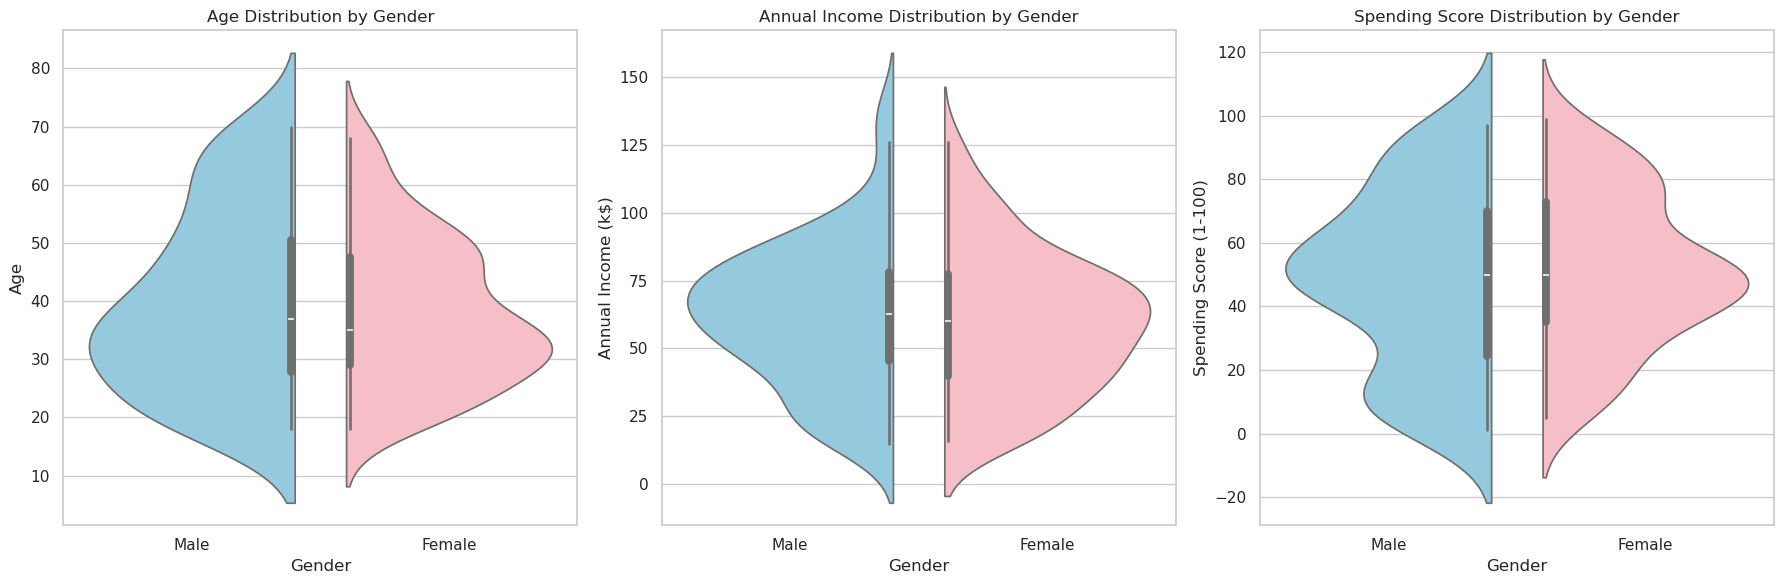

In [44]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(x='Gender', y='Age', data=df, split=True, ax=axes[0], palette={"Male": "skyblue", "Female": "lightpink"})
axes[0].set_title('Age Distribution by Gender')

sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, split=True, ax=axes[1], palette={"Male": "skyblue", "Female": "lightpink"})
axes[1].set_title('Annual Income Distribution by Gender')

sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, split=True, ax=axes[2], palette={"Male": "skyblue", "Female": "lightpink"})
axes[2].set_title('Spending Score Distribution by Gender')

plt.tight_layout()

plt.show()

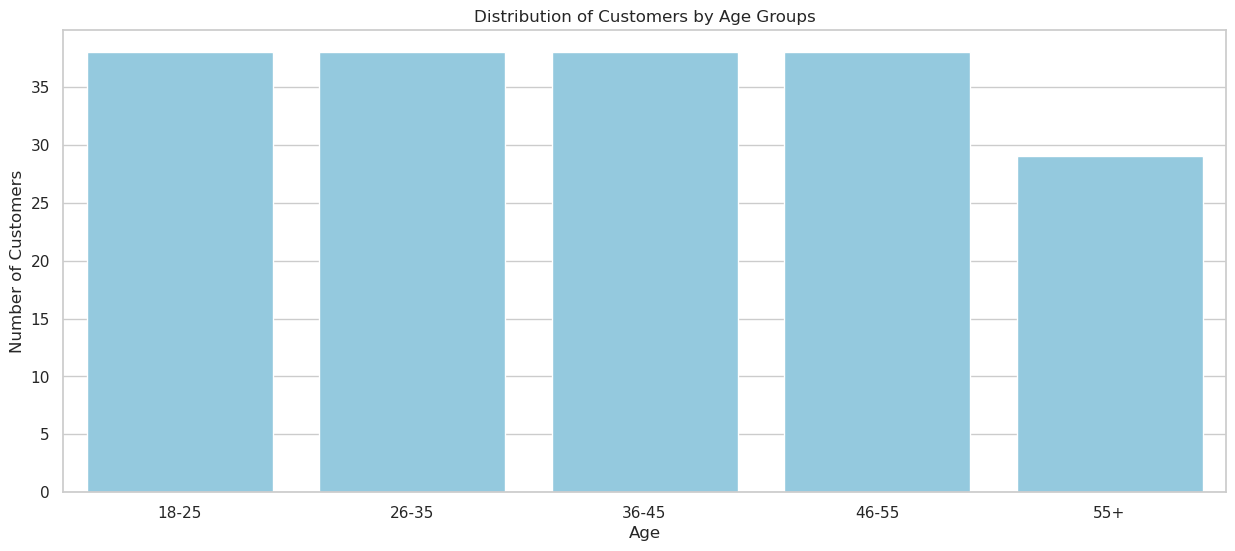

In [47]:
age_18_25 = df.Age[(df.Age>=18) & (df.Age <=25)]
age_26_35 = df.Age[(df.Age>=18) & (df.Age <=25)]
age_36_45 = df.Age[(df.Age>=18) & (df.Age <=25)]
age_46_55 = df.Age[(df.Age>=18) & (df.Age <=25)]
age_55_above = df.Age[df.Age>=56]

agex= ["18-25", "26-35", "36-45","46-55","55+"]
agey=[len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55_above.values)]


plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, color='skyblue')

plt.title('Distribution of Customers by Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.show()


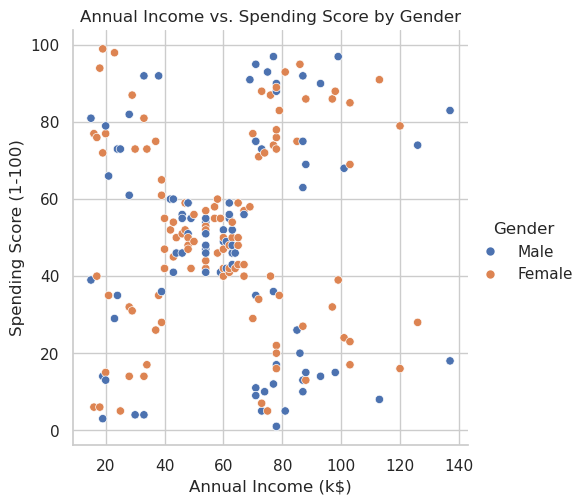

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()  
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)

plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()



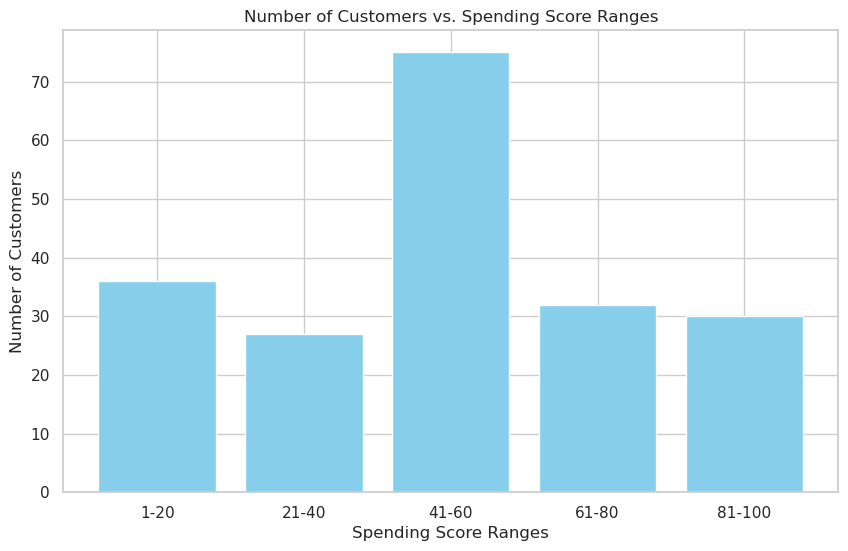

In [54]:
import matplotlib.pyplot as plt

ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20), len(ss_21_40), len(ss_41_60), len(ss_61_80), len(ss_81_100)]

plt.figure(figsize=(10, 6))
plt.bar(ssx, ssy, color='skyblue')

plt.title('Number of Customers vs. Spending Score Ranges')
plt.xlabel('Spending Score Ranges')
plt.ylabel('Number of Customers')

plt.show()


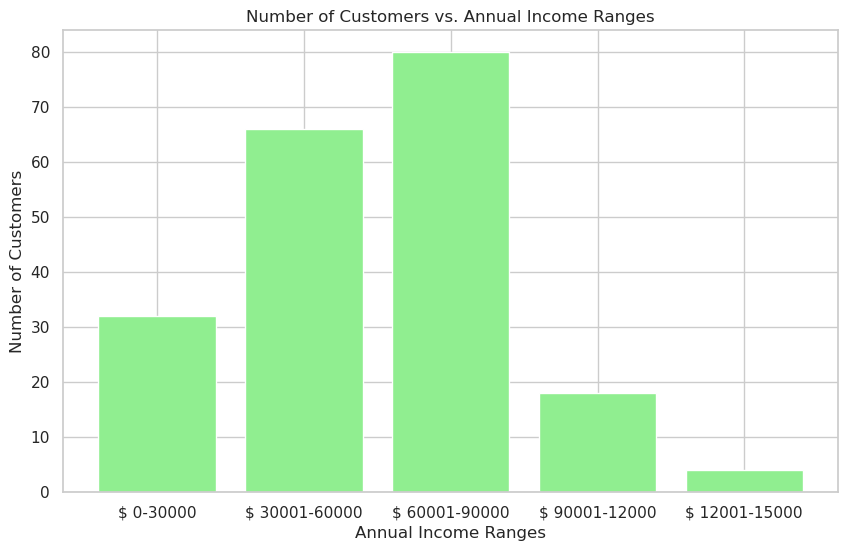

In [55]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix= ["$ 0-30000", "$ 30001-60000", "$ 60001-90000", "$ 90001-12000", "$ 12001-15000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10, 6))
plt.bar(aix, aiy, color='lightgreen')

plt.title('Number of Customers vs. Annual Income Ranges')
plt.xlabel('Annual Income Ranges')
plt.ylabel('Number of Customers')

plt.show()

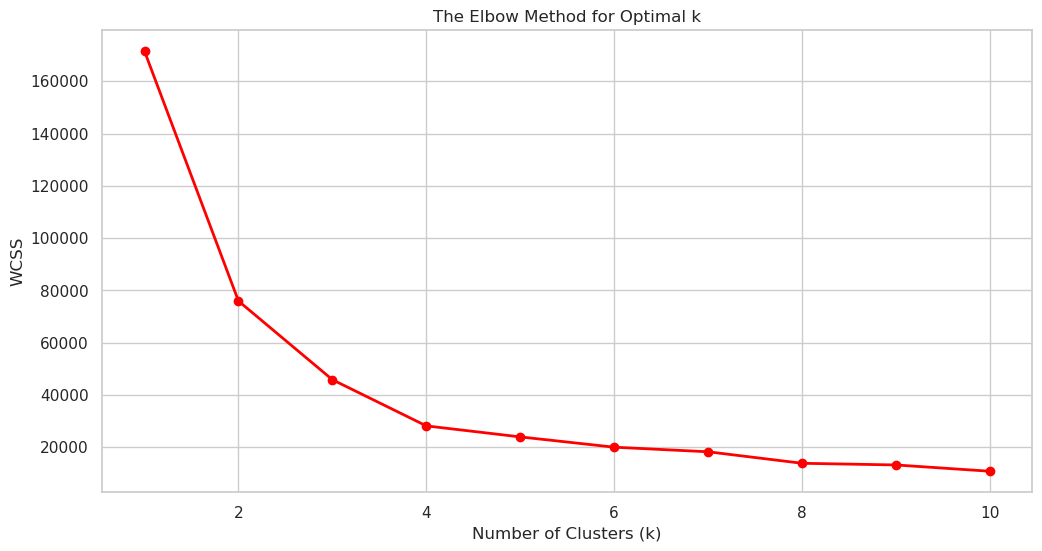

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, marker='o', linewidth=2, color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method for Optimal k')
plt.show()


In [67]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X2)
print(label)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


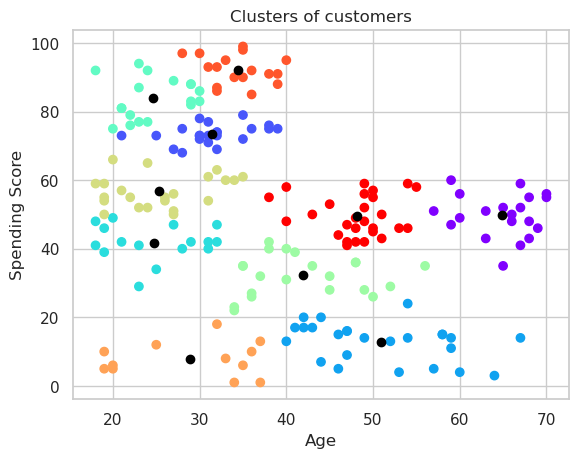

In [65]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],color='black')
plt.title("Clusters of customers")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

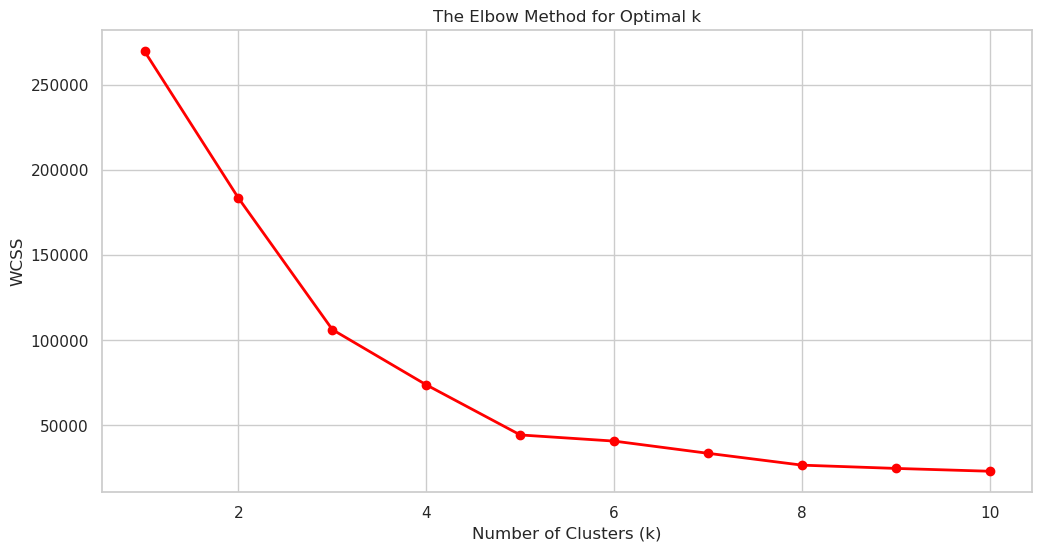

In [66]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, marker='o', linewidth=2, color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method for Optimal k')
plt.show()


In [68]:
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X2)
print(label)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


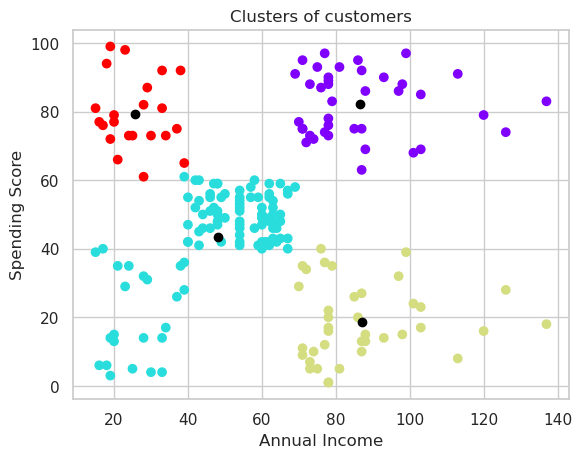

In [71]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],color='black')
plt.title("Clusters of customers")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

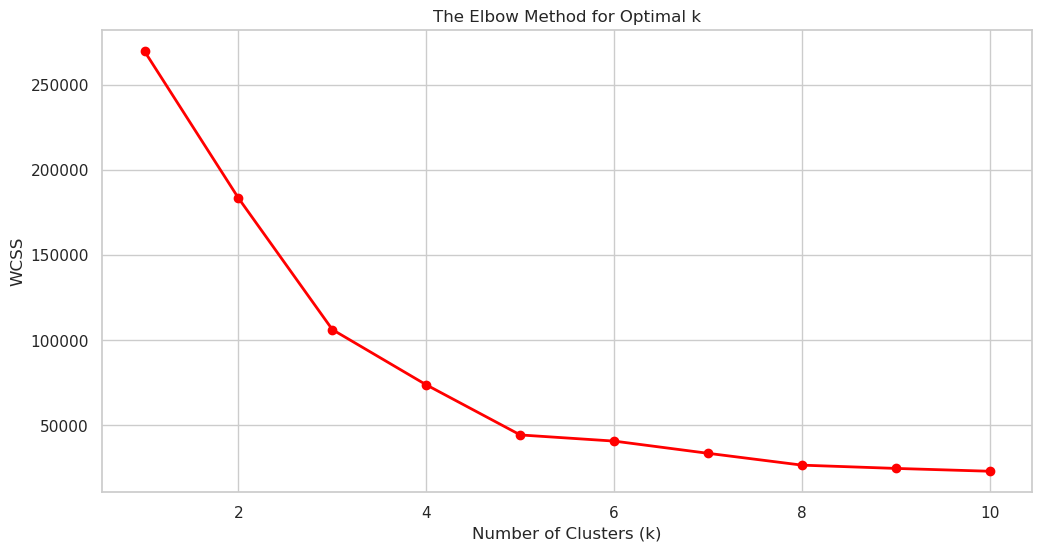

In [77]:
X3=df.iloc[:,1:]

from sklearn.cluster import KMeans

X3= df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)", "Age"]].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, marker='o', linewidth=2, color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method for Optimal k')
plt.show()

In [78]:
kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 3 4 1 4 1 4 3 1 1 1 3 1 1 3 3 1 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 3 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 1 3 1 1 3 3 3 3 1 3 3 3 3 3
 1 3 1 1 1 3 3 3 3 3 3 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [79]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513 32.69230769]
 [40.64583333 36.16666667 33.75      ]
 [87.         18.63157895 40.39473684]
 [55.28846154 49.73076923 52.94230769]
 [26.30434783 78.56521739 25.52173913]]


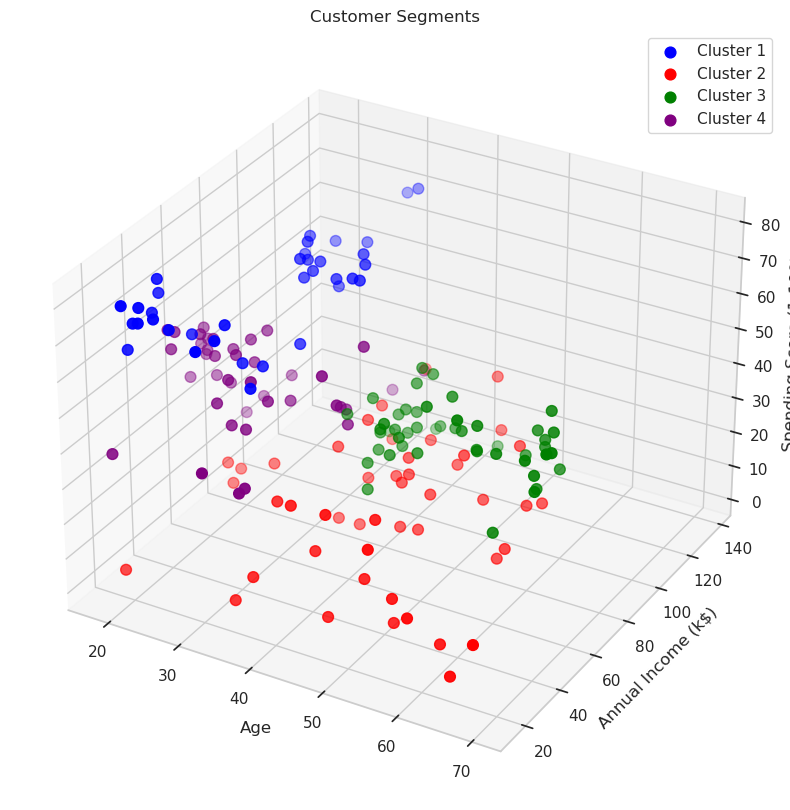

In [81]:
clusters=kmeans.fit_predict(X3)
df["label"]=clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

clusters = kmeans.fit_predict(X1)
df["label"] = clusters

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label='Cluster 1')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label='Cluster 2')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label='Cluster 3')
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='purple', s=60, label='Cluster 4')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

ax.set_title('Customer Segments')

ax.legend()

plt.show()
